# **Mammography Training Using Data Science**



BY- UJJWAL BHATNAGAR 

# **Introduction**
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnoses (CAD) systems have been proposed in the last years. These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short-term follow-up examination instead.

***Lets Begin:***

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dss.csv to dss.csv


In [7]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['dss.csv']))

In [8]:
df2.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,NaN,1


In [48]:
df2.shape

(747, 6)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   BI_RADS       747 non-null    category
 1   Age           747 non-null    float64 
 2   Shape         747 non-null    object  
 3   Margin        747 non-null    object  
 4   Mass_Density  747 non-null    object  
 5   Severity      747 non-null    int64   
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 36.1+ KB


In [50]:
df2[["BI_RADS", "Age", "Shape", "Margin", "Mass_Density", "Severity"]].describe()

,Age,Severity
count,747.000000,747.000000
mean,56.253012,0.491299
std,17.422182,0.500259
min,5.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,130.000000,1.000000


In [11]:
#Replacing missing values is to replace them with a single value.

df2 = df2.dropna()
features = list(df2.columns[:4])
X = df2[features].values
print(X)
labels = list(df2.columns[4:])
y = df2[labels].values
y = y.ravel()
print(y)

[[5.0 67.0 'lobular' 'spiculated']
 [5.0 58.0 'irregular' 'spiculated']
 [4.0 28.0 'round' 'circumscribed']
 ...
 [4.0 64.0 'irregular' 'spiculated']
 [5.0 66.0 'irregular' 'spiculated']
 [4.0 62.0 'lobular' 'obscured']]
['low' 1 'low' ... 1 'low' 0]


In [25]:
# EDA – review the data description
df2.describe().head(3)

,BI_RADS,Age,Severity
count,747.000000,747.000000,747.000000
mean,4.396252,56.253012,0.491299
std,1.977321,17.422182,0.500259


In [68]:
#preprocessing
#cleaning
df2.loc[df2['Age'].isna(), 'Age'] = 0
df2['Severity'] = df2['Severity'].astype('category')

In [69]:
#Now that our data is clean and imputed we will need to select our predictors and split the data into training and test sets.

from sklearn.model_selection import train_test_split
X = df2[["Age"]]
y = df2["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [34]:
# will train a Decision Tree with a max depth of 3 on our training data

from sklearn.tree import DecisionTreeClassifier
autoDT = DecisionTreeClassifier(random_state=0, max_depth=3)
autoDT.fit(X_train, y_train)
pred_y = autoDT.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)
pd.DataFrame(cm)

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,5,0,0
2,0,0,71,7,0
3,0,0,35,27,0
4,0,0,4,0,0


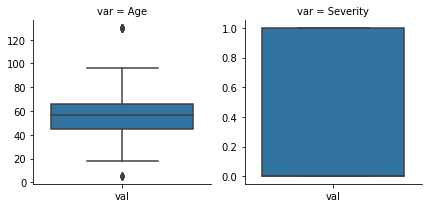

In [51]:
#Visualising the Dataset

numerics = ['int64', 'float64']
newdf = df2.select_dtypes(include=numerics)
newdf = newdf.melt(var_name='var', value_name='val')
import seaborn as sns
sns.catplot(data=newdf, kind='box', height=3, col='var', col_wrap=3, sharey=False);

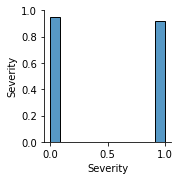

In [59]:
numerics = ['int64', 'float64']
newdf = df2.select_dtypes(include=numerics).drop("Age", axis=1)
numeric_columns = newdf.columns
newdf = newdf.assign(Age = df2["Age"])
sns.pairplot(newdf.dropna(), vars=numeric_columns.values);

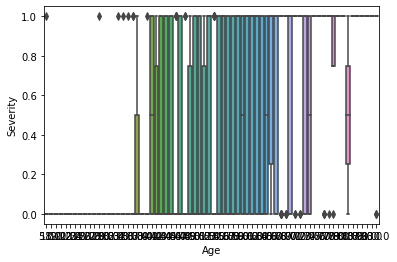

In [62]:
sns.boxplot(x="Age", y="Severity", data=df2);

In [66]:
# Applying Decision Tree to the dataset.

from sklearn.model_selection import train_test_split
X = df2[["Age"]]
y = df2["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
autoDT = DecisionTreeClassifier(random_state=0, max_depth=3)
autoDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [67]:
# set the maximum depth and then re-train the algorithm.

autoDT2 = DecisionTreeClassifier(max_depth=1, random_state=0)
autoDT2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## **Evaluation:**
* What considerations have been used for model selection? 
  
   Decision Tree algorithm is considered because it is fast and that its output is easy to explain. The algorithm is well suited for problems where the problem space is linearly separable. It is also able to handle continuous, categorical and missing data.
  
* What features would you want to create for your prediction model based on data provided?

  Two different matrices are formed in output dataset that contains the results from mammogram interpretation.
  
* What is your model evaluation criteria? What are the assumptions and limitations of your approach?

  Logistic regression is an efficient and powerful way to analyze the effect of a group of independent variables on a binary outcome by quantifying each independent variable's unique contribution. Using components of linear regression reflected in the logit scale, logistic regression iteratively identifies the strongest linear combination of variables with the greatest probability of detecting the observed outcome. Important considerations when conducting logistic regression include selecting independent variables, ensuring that relevant assumptions are met, and choosing an appropriate model building strategy.
  
* Determine whether the data is normally distributed visually and statistically.

  Data is statistically distributed.

* What techniques have been used for treating missing values to prepare features for model building?

  Methods to impute missing data can be broadly split into three categories: Model based imputation, donor imputation and scalar imputation. We will discuss an example from each of these category next.

* Comment on any other observations or recommendations based on your analysis.

  Algorithm is also designed in such a way to overcome the disadvantages of Decision Trees such as overfitting. Part of this design is to create multiple trees based on different samples of the data which is a form of performing cross validation.

***END OF EVALUATION***